#                       <font color=darkorchid>Predicting Online Courses Rating </font>

In [ ]:
# Target: Predicting the number of people who ratied each course using Linear Regression

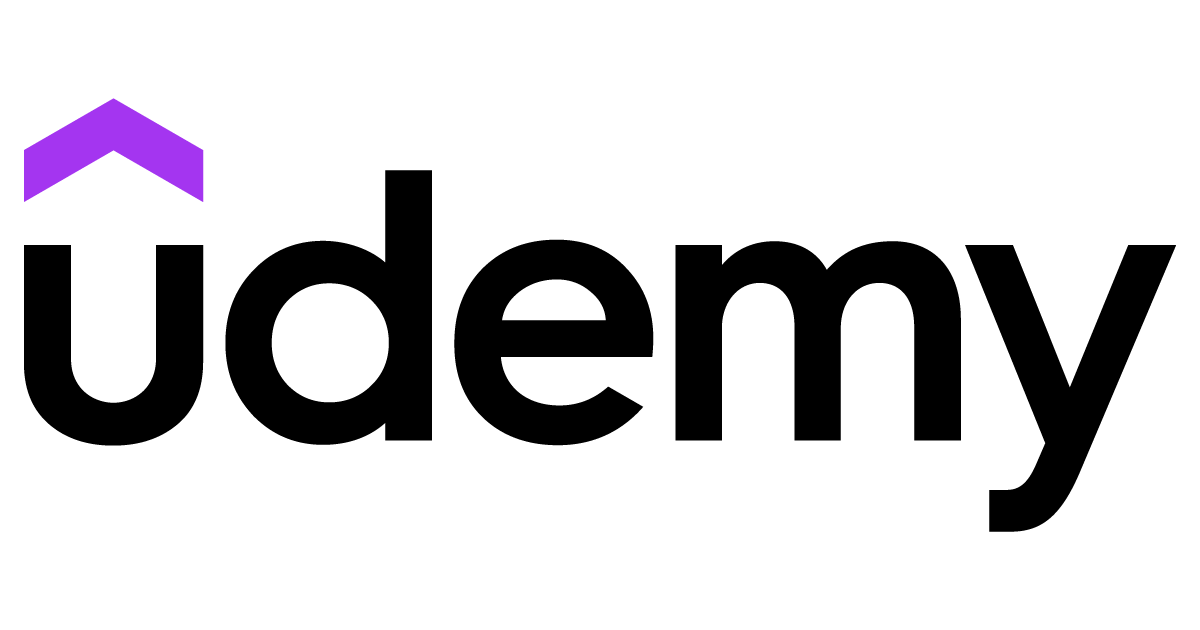

# Appendix
- Click on the links:
>1. <a href=#imports>Imports</a>
>2. <a href=#LoadData>Load Data</a>
>4. <a href=#DataFormating>Data Formating</a>
>5. <a href=#EDA>EDA</a>
>6. <a href=#BaselineModel>Baseline Model</a>
>7. <a href=#Basic>Basic feature engineering</a>
>8. <a href=#Intermediate>Intermediate feature enguneering</a>

## Introduction:


Udemy is an American educational platform for open online courses that professional adults and students can take. It was founded in May 2010. it Contains many categorical fields such as development, design, business, technology, and marketing.

In June of 2021, the platform has more than 44 million students, 183,000 courses, and 65,000 instructors teaching courses in 75 languages. There have been over 594 million course enrollments.



## Motivation:

By using Udemy online courses dataset, we will be able to predict the rating of courses based on the features that we have. 



## Data Description:

The dataset that we will be using for our prediction is taken form Kaggle. 
Below is the list of features we will be using:

- id : The course ID of that particular course.
- title : Shows the unique names of the courses available under the development category on Udemy.
- enrollment : The cumulative number of students in the course
- subscribers : Shows the number of people who have subscribed that course.
- stars : The number of ratings (reviews) of the course
- rating : Average rating for the course
- reviews : Gives us an idea related to the number of ratings that a course has received.
- published_lectures : Shows the number of lectures the course offers.
- published_time : Time of publishing the course.
- category: Category of course from which it related.
- course_price : The original price of a particular course.
- discounted_ price_amount : The discounted price which a certain course is being offered at.
- price_currency : The currency corresponding to the price detail amount for a course.



# <a name='imports' >Libraries Imports</a> 

In [610]:
# Data Analysis Libs
print("Importing.....", end="", flush=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
print("[Done]")

Importing.....[Done]


### <a name='LoadData' >Load Data</a> 

In [611]:
df = pd.read_csv("udemy_output.csv") # Loading the dataset

In [612]:
df.head() #show the first 5 rows

,id,title,enrollment,subscribers,rating,stars,category,reviews,published_lectures,published_time,course_price,discount_price,price_currency
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,1100093,295509,318066,4.6,Technology,78006,84,2016-04-06T05:16:11Z,124,7.0,USD
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,596726,209070,182997,4.6,Technology,54581,78,2016-08-23T16:59:49Z,124,7.0,USD
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,692812,155282,132228,4.5,Technology,52653,292,2017-11-14T23:58:14Z,124,7.0,USD
3,648826,The Complete Financial Analyst Course 2020,422557,245860,129984,4.6,Technology,46447,338,2016-01-21T01:38:48Z,124,7.0,USD
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,502572,374836,123798,4.6,Technology,41630,83,2016-01-11T21:39:33Z,124,7.0,USD


In [613]:
df.tail() #show the last 5 rows by default

,id,title,enrollment,subscribers,rating,stars,category,reviews,published_lectures,published_time,course_price,discount_price,price_currency
8088,1516977,Fundamental Service Oriented Arch (SOA) Securi...,2389,16,116,3.9,Finance,2,0,2018-01-28T09:20:37Z,18,7.0,USD
8089,1479824,Linux Certification for Experts - Practice Tes...,772,15,111,3.6,Finance,2,0,2017-12-24T07:38:36Z,18,7.0,USD
8090,1879598,SAP SuccessFactors Employee Central Payroll Fu...,678,19,111,3.9,Finance,2,5,2018-09-19T23:19:18Z,18,NaN,USD
8091,1940616,Comptia Linux+ / LPIC-1 (102-400),680,1082,111,4.4,Finance,2,31,2018-12-11T16:22:32Z,18,7.0,USD
8092,543712,Cisco Networking CCNA IPv6 OSPF,748,858,110,4.0,Finance,2,24,2015-07-07T00:01:23Z,124,7.0,USD


# <a name='DataFormating' >Data Formating</a> 

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8093 entries, 0 to 8092
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8093 non-null   int64  
 1   title               8093 non-null   object 
 2   enrollment          8093 non-null   int64  
 3   subscribers         8093 non-null   int64  
 4   rating              8093 non-null   int64  
 5   stars               8093 non-null   float64
 6   category            8093 non-null   object 
 7   reviews             8093 non-null   int64  
 8   published_lectures  8093 non-null   int64  
 9   published_time      8093 non-null   object 
 10  course_price        8093 non-null   int64  
 11  discount_price      7673 non-null   float64
 12  price_currency      8093 non-null   object 
dtypes: float64(2), int64(7), object(4)
memory usage: 822.1+ KB


In [615]:
df.shape # the numbers of rows & columns in the dataframe

(8093, 13)

In [616]:
df.columns #shows the name of columns

Index(['id', 'title', 'enrollment', 'subscribers', 'rating', 'stars',
       'category', 'reviews', 'published_lectures', 'published_time',
       'course_price', 'discount_price', 'price_currency'],
      dtype='object')

In [617]:
df.describe() #used to view some basic statistical details like percentile, mean, std

,id,enrollment,subscribers,rating,stars,reviews,published_lectures,course_price,discount_price
count,8.093000e+03,8.093000e+03,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,7673.000000
mean,1.932335e+06,6.083829e+03,2808.853454,626.250093,3.718065,217.621154,33.291981,62.099098,7.360094
std,9.179912e+05,2.641978e+04,10441.247000,6002.954120,1.373654,1884.104371,50.733881,44.991110,2.969081
min,2.762000e+03,0.000000e+00,2.000000,0.000000,0.000000,2.000000,0.000000,18.000000,7.000000
25%,1.251642e+06,2.800000e+01,79.000000,4.000000,3.700000,9.000000,8.000000,18.000000,7.000000
50%,2.027620e+06,8.360000e+02,469.000000,32.000000,4.200000,24.000000,21.000000,46.000000,7.000000
75%,2.685906e+06,4.007000e+03,2306.000000,302.000000,4.500000,105.000000,41.000000,120.000000,7.000000
max,3.473936e+06,1.100093e+06,374836.000000,318066.000000,5.000000,78006.000000,699.000000,184.000000,46.000000


# <a name='EDA' >EDA</a> 

## Catagories

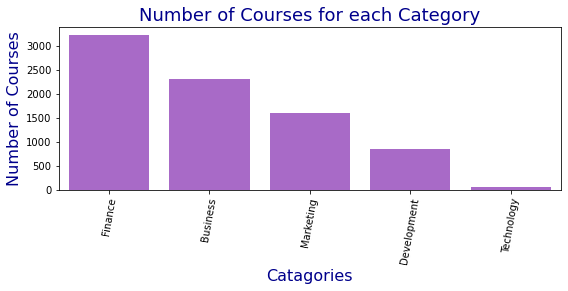

In [618]:
category = df['category'].value_counts()
plt.figure(figsize=(9,3))
sns.barplot(category.index, category.values, alpha=0.8, color='darkorchid')
plt.ylabel('Number of Courses', fontsize=16, color='darkblue')
plt.xlabel('Catagories', fontsize=16, color='darkblue')
plt.title('Number of Courses for each Category', fontsize=18, color='darkblue')
plt.xticks(rotation=80)
plt.show();

## Top 10 Most Popular Courses by subscribers

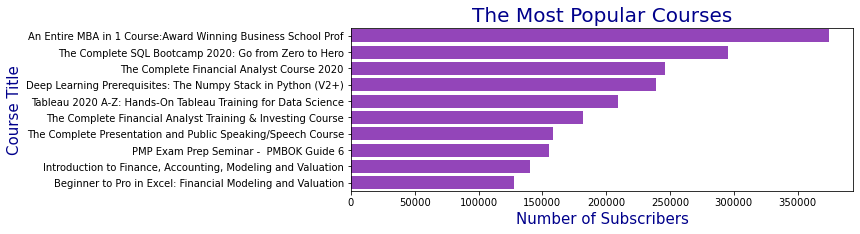

In [619]:
top_course = df.sort_values(by='subscribers', ascending=False)[:10]
figure = plt.figure(figsize=(9,3))
sns.barplot(y=top_course.title, x=top_course.subscribers, color='darkorchid')
plt.xticks()
plt.xlabel('Number of Subscribers', fontsize=15, color='darkblue')
plt.ylabel('Course Title', fontsize=15, color='darkblue')
plt.title('The Most Popular Courses', fontsize=20, color='darkblue')
plt.show()

## Top 10 Most Popular Courses by reviews

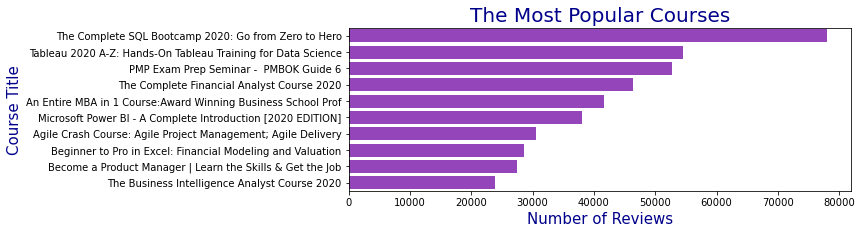

In [620]:
top_course = df.sort_values(by='reviews', ascending=False)[:10]
figure = plt.figure(figsize=(9,3))
sns.barplot(y=top_course.title, x=top_course.reviews, color='darkorchid')
plt.xticks()
plt.xlabel('Number of Reviews', fontsize=15, color='darkblue')
plt.ylabel('Course Title', fontsize=15, color='darkblue')
plt.title('The Most Popular Courses', fontsize=20, color='darkblue')
plt.show()

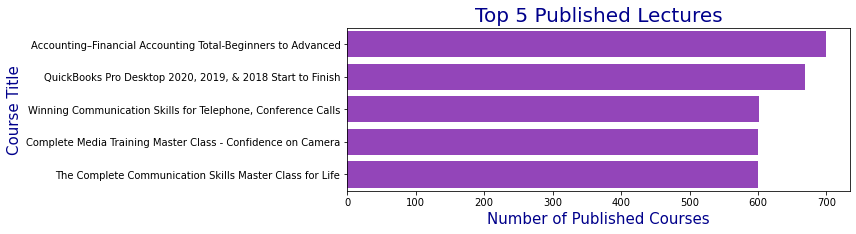

In [621]:
top_course = df.sort_values(by='published_lectures', ascending=False)[:5]
figure = plt.figure(figsize=(9,3))
sns.barplot(y=top_course.title, x=top_course.published_lectures, color='darkorchid')
plt.xticks()
plt.xlabel('Number of Published Courses', fontsize=15, color='darkblue')
plt.ylabel('Course Title', fontsize=15, color='darkblue')
plt.title('Top 5 Published Lectures', fontsize=20, color='darkblue')
plt.show()

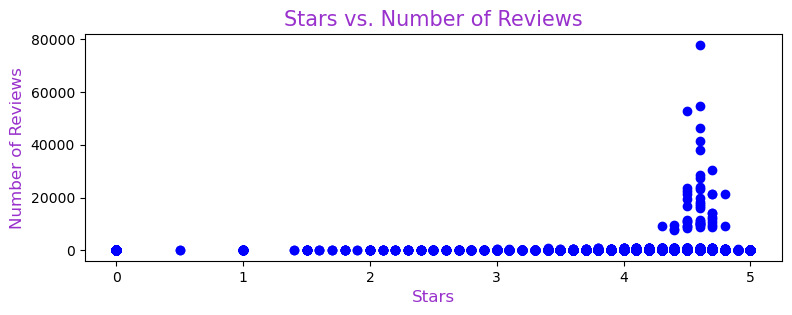

In [624]:
plt.scatter(df['stars'], df['reviews'], color='blue')
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':100})
plt.title('Stars vs. Number of Reviews', fontsize=15, color='darkorchid')
plt.xlabel('Stars', fontsize=12, color='darkorchid')
plt.ylabel('Number of Reviews', fontsize=12, color='darkorchid')
plt.show()

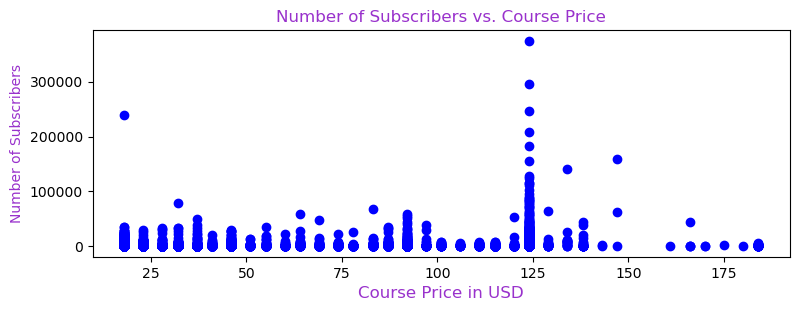

In [623]:
plt.scatter(df['course_price'], df['subscribers'], color='blue')
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':100})
plt.title('Number of Subscribers vs. Course Price', fontsize=12, color='darkorchid')
plt.xlabel('Course Price in USD', fontsize=12, color='darkorchid')
plt.ylabel('Number of Subscribers', fontsize=10, color='darkorchid')
plt.show()

In [625]:
# to drop title and price_currency columns 

df.drop(['title', 'price_currency'], axis=1, inplace=True)

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8093 entries, 0 to 8092
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8093 non-null   int64  
 1   enrollment          8093 non-null   int64  
 2   subscribers         8093 non-null   int64  
 3   rating              8093 non-null   int64  
 4   stars               8093 non-null   float64
 5   category            8093 non-null   object 
 6   reviews             8093 non-null   int64  
 7   published_lectures  8093 non-null   int64  
 8   published_time      8093 non-null   object 
 9   course_price        8093 non-null   int64  
 10  discount_price      7673 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 695.6+ KB


In [627]:
# cheaching for null valuse 
df.isnull().sum()

id                      0
enrollment              0
subscribers             0
rating                  0
stars                   0
category                0
reviews                 0
published_lectures      0
published_time          0
course_price            0
discount_price        420
dtype: int64

In [628]:
df.dropna(inplace=True)

In [629]:
df.isnull().sum()

id                    0
enrollment            0
subscribers           0
rating                0
stars                 0
category              0
reviews               0
published_lectures    0
published_time        0
course_price          0
discount_price        0
dtype: int64

In [631]:
# to change the date type from object to datetime

df['published_time'] = pd.to_datetime(df['published_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7673 entries, 0 to 8092
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  7673 non-null   int64              
 1   enrollment          7673 non-null   int64              
 2   subscribers         7673 non-null   int64              
 3   rating              7673 non-null   int64              
 4   stars               7673 non-null   float64            
 5   category            7673 non-null   object             
 6   reviews             7673 non-null   int64              
 7   published_lectures  7673 non-null   int64              
 8   published_time      7673 non-null   datetime64[ns, UTC]
 9   course_price        7673 non-null   int64              
 10  discount_price      7673 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(7), object(1)
memory usage: 719.3+ KB


In [632]:
df['discount_price'] = df.discount_price.astype(int)

In [633]:
df['course_price'] = df.course_price.astype(int)

In [634]:
df['stars'] = df.stars.astype(int)

In [635]:
df.dtypes

id                                  int64
enrollment                          int64
subscribers                         int64
rating                              int64
stars                               int32
category                           object
reviews                             int64
published_lectures                  int64
published_time        datetime64[ns, UTC]
course_price                        int32
discount_price                      int32
dtype: object

In [636]:
df.describe()

,id,enrollment,subscribers,rating,stars,reviews,published_lectures,course_price,discount_price
count,7.673000e+03,7.673000e+03,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000
mean,1.948701e+06,6.155829e+03,2888.253486,636.451974,3.354881,220.933663,33.078587,62.282810,7.360094
std,9.136100e+05,2.692377e+04,10688.033793,6138.529120,1.286747,1924.761690,50.454046,44.470952,2.969081
min,2.762000e+03,0.000000e+00,2.000000,0.000000,0.000000,2.000000,0.000000,18.000000,7.000000
25%,1.259464e+06,2.800000e+01,81.000000,4.000000,3.000000,9.000000,8.000000,18.000000,7.000000
50%,2.058655e+06,8.360000e+02,474.000000,32.000000,4.000000,24.000000,21.000000,46.000000,7.000000
75%,2.694950e+06,4.031000e+03,2363.000000,305.000000,4.000000,105.000000,41.000000,124.000000,7.000000
max,3.473936e+06,1.100093e+06,374836.000000,318066.000000,5.000000,78006.000000,699.000000,166.000000,46.000000


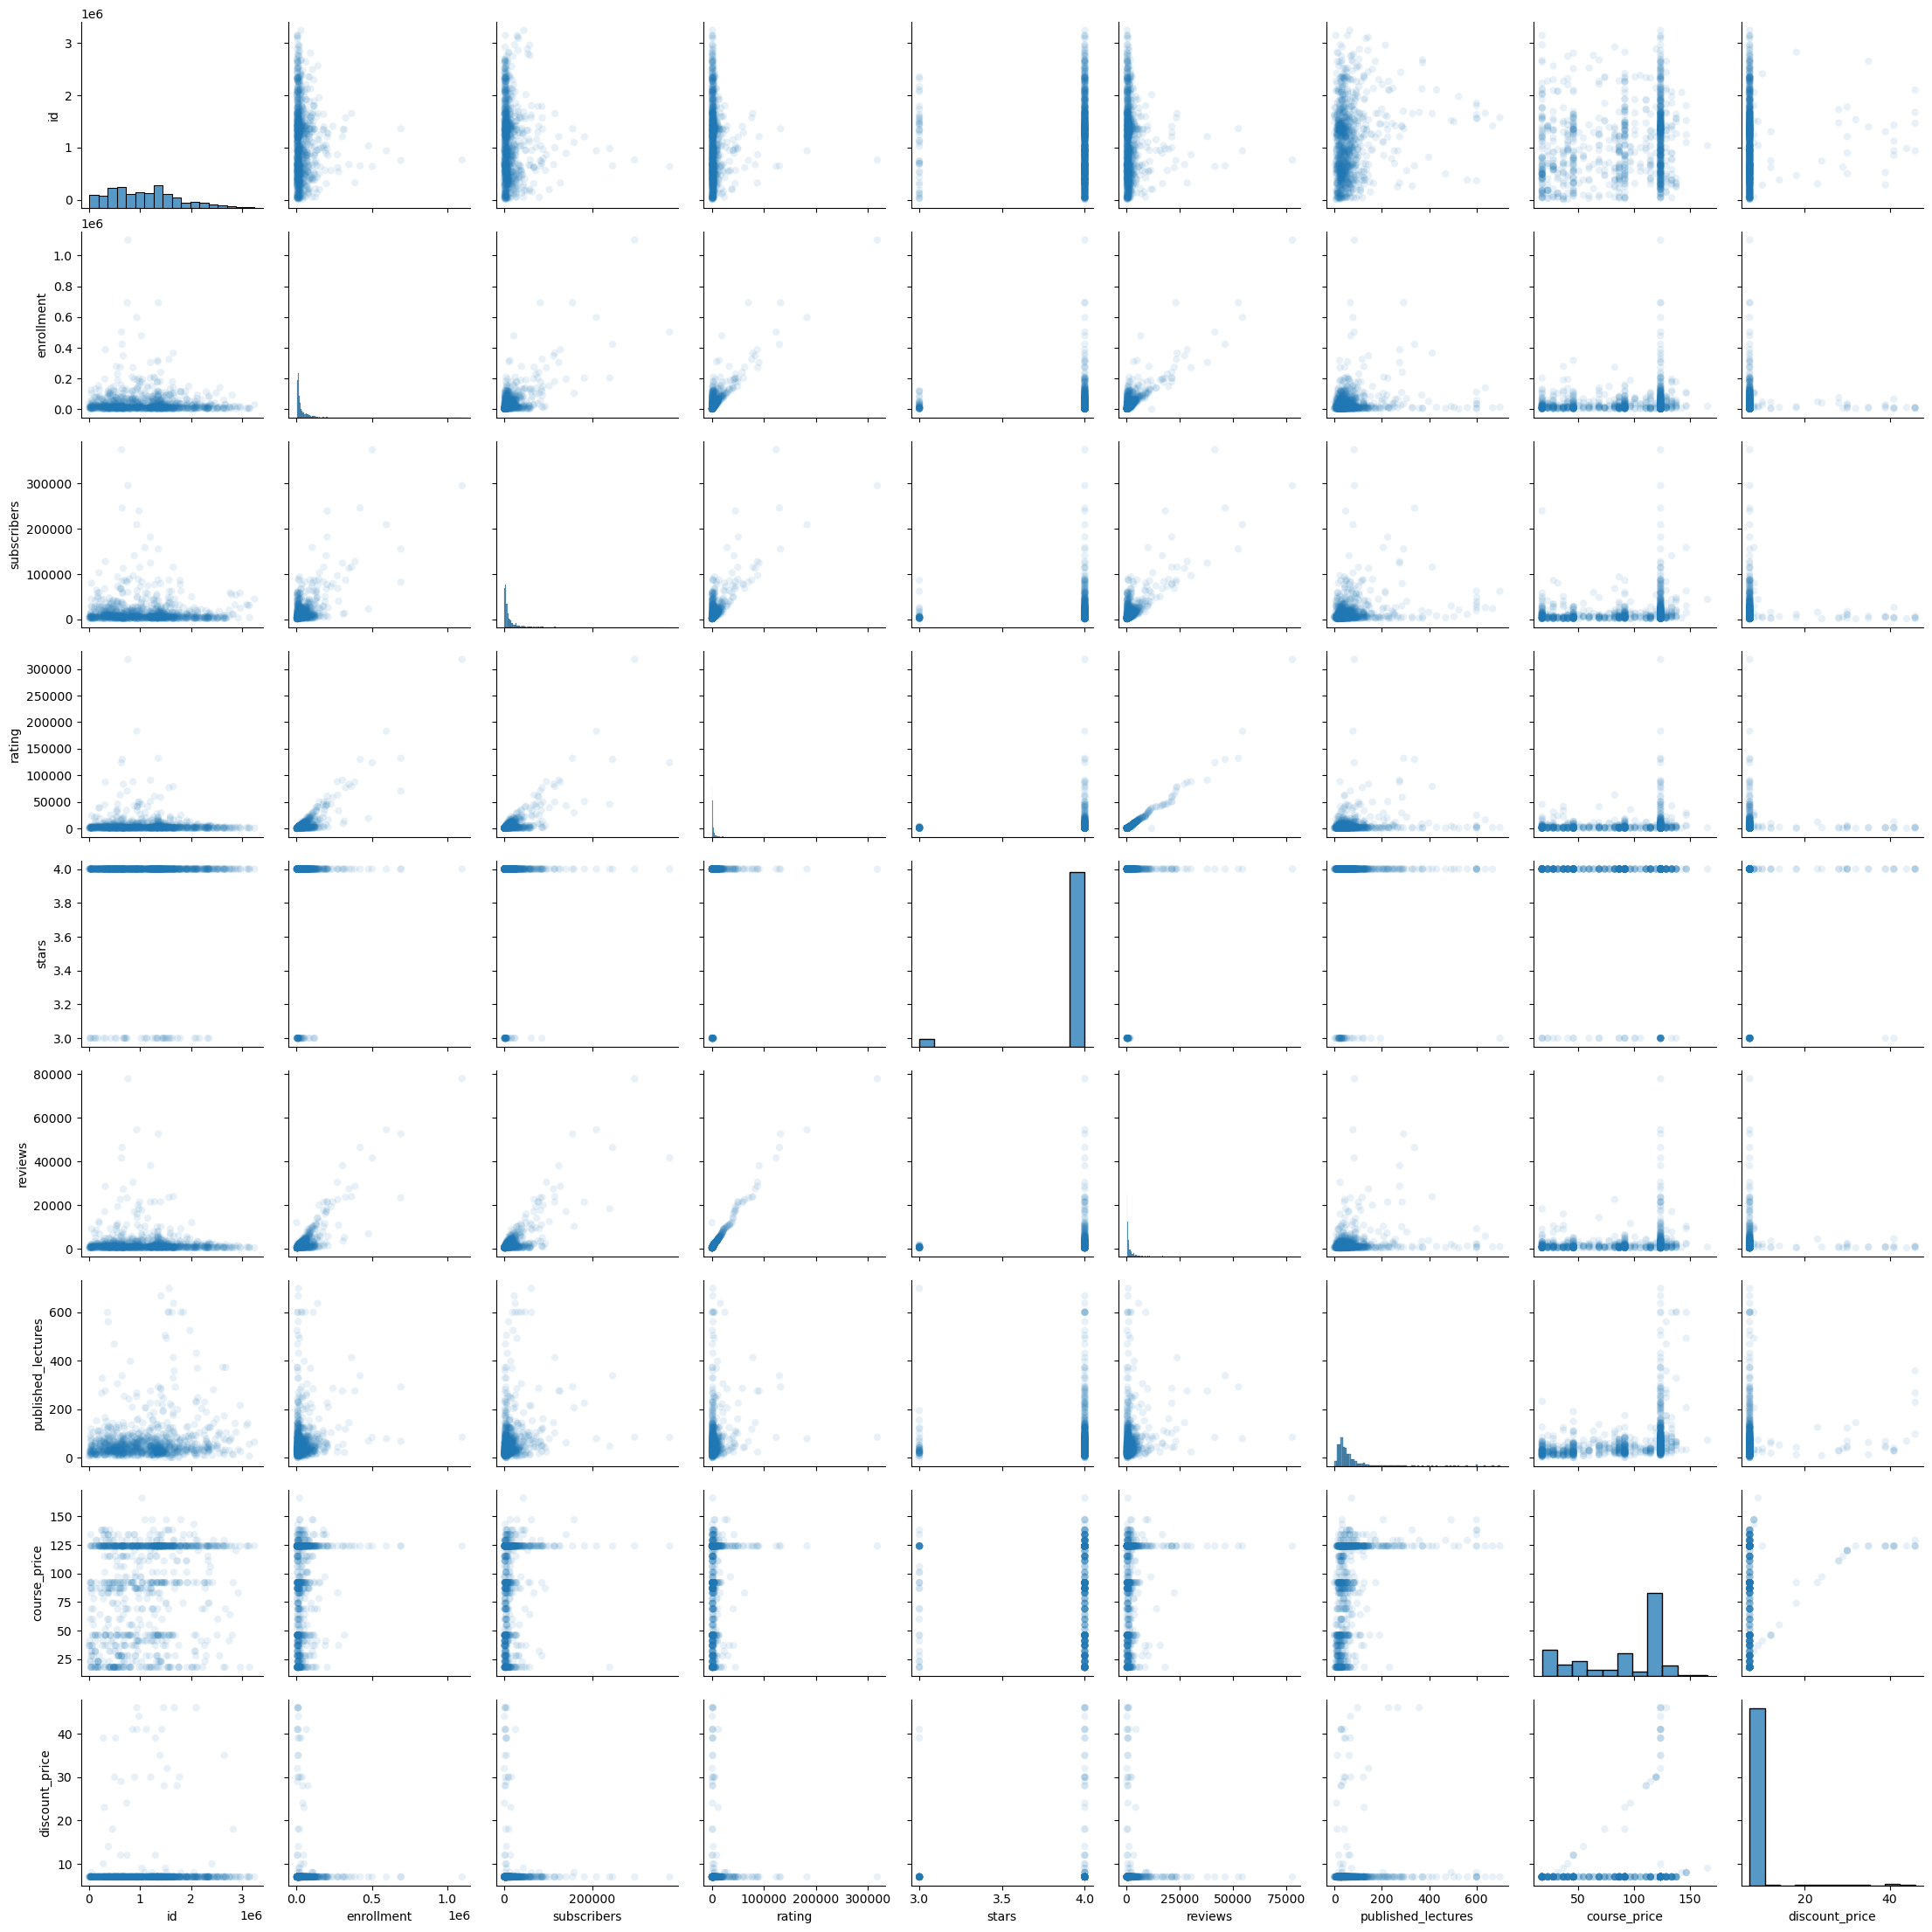

In [27]:
sns.pairplot(df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

# Setting up for modeling and building a baseline:

# <a name='BaselineModel' >Baseline Model</a> 

In [637]:
#Separate our features from our target

# X is features and y is the target that we are going to predict 

X = df.loc[:,['enrollment', 'subscribers', 'stars', 'published_lectures', 'course_price', 'discount_price']]

y = df['rating']

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7673 entries, 0 to 8092
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  7673 non-null   int64              
 1   enrollment          7673 non-null   int64              
 2   subscribers         7673 non-null   int64              
 3   rating              7673 non-null   int64              
 4   stars               7673 non-null   int32              
 5   category            7673 non-null   object             
 6   reviews             7673 non-null   int64              
 7   published_lectures  7673 non-null   int64              
 8   published_time      7673 non-null   datetime64[ns, UTC]
 9   course_price        7673 non-null   int32              
 10  discount_price      7673 non-null   int32              
dtypes: datetime64[ns, UTC](1), int32(3), int64(6), object(1)
memory usage: 629.4+ KB


In [639]:
df.shape

(7673, 11)

## Creating train/validation split

In [641]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    train_score = lr_model.score(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [642]:
split_and_validate(X, y)


Train R^2 score was: 0.8277370569777377

Validation R^2 score was: 0.8338499601851603
Feature coefficient results: 

enrollment : 0.14
subscribers : 0.17
stars : -118.01
published_lectures : 0.17
course_price : -4.88
discount_price : 8.68


# <a name='Basic' >Basic feature engineering</a> 

## 1- Adding Polynomial terms

In [643]:
# relationship between each feature and the target.

In [574]:
X2 = X.copy()

X2['EN'] = X2['enrollment'] ** 2
X2['SU'] = X2['subscribers'] ** 2

split_and_validate(X2, y)


Train R^2 score was: 0.8476484814436328

Validation R^2 score was: 0.948726073895959
Feature coefficient results: 

enrollment : 0.10
subscribers : 0.13
stars : -60.35
published_lectures : 0.83
course_price : -3.23
discount_price : 6.46
EN : 0.00
SU : 0.00


In [644]:
X2['ST'] = X2['stars'] ** 2
X2['DP'] = X2['discount_price'] ** 2

split_and_validate(X2, y)


Train R^2 score was: 0.8479348788864665

Validation R^2 score was: 0.9486043804216749
Feature coefficient results: 

enrollment : 0.10
subscribers : 0.13
stars : -291.81
published_lectures : 0.84
course_price : -3.23
discount_price : 6.98
EN : 0.00
SU : 0.00
ST : 51.42
DP : -0.01


## 2- Adding interaction terms

In [645]:
X3 = X2.copy()

# multiplicative interaction
X3['EN_x_SU'] = X3['enrollment'] * X3['subscribers']

# division interaction
X3['EN/_DP'] = X3['enrollment'] / X3['discount_price']

split_and_validate(X3, y)


Train R^2 score was: 0.9159260508095589

Validation R^2 score was: 0.9367225435824654
Feature coefficient results: 

enrollment : 0.04
subscribers : 0.14
stars : -266.74
published_lectures : 0.20
course_price : -2.56
discount_price : 42.09
EN : -0.00
SU : -0.00
ST : 50.27
DP : -0.55
EN_x_SU : 0.00
EN/_DP : 0.37


# <a name='Intermediate' >Intermediate feature engineering</a> 

In [646]:
## catagirical features using dummy variables method

In [647]:
df['category'].unique()

array(['Technology', 'Business', 'Marketing', 'Finance', 'Development'],
      dtype=object)

In [648]:
df['category'].value_counts()

Finance        3050
Business       2205
Marketing      1541
Development     809
Technology       68
Name: category, dtype: int64

In [649]:
pd.get_dummies(df['category']).head()

,Business,Development,Finance,Marketing,Technology
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [650]:
pd.get_dummies(df['category']).tail()

,Business,Development,Finance,Marketing,Technology
8087,0,0,1,0,0
8088,0,0,1,0,0
8089,0,0,1,0,0
8091,0,0,1,0,0
8092,0,0,1,0,0


In [651]:
X4 = X3.copy()

X4['category'] = df['category']

split_and_validate(pd.get_dummies(X4), y)


Train R^2 score was: 0.9340455941636014

Validation R^2 score was: 0.9534202523041918
Feature coefficient results: 

enrollment : -0.03
subscribers : 0.12
stars : -88.71
published_lectures : 0.60
course_price : -0.78
discount_price : 37.91
EN : -0.00
SU : -0.00
ST : 25.16
DP : -0.35
EN_x_SU : 0.00
EN/_DP : 0.79
category_Business : -2196.95
category_Development : -1619.14
category_Finance : -1368.02
category_Marketing : -1558.07
category_Technology : 6742.18


# Scaling

In [653]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [654]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [655]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

# Lasso

In [656]:
lasso_model = Lasso(alpha = 1000)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1000)

In [657]:
list(zip(X_train.columns, lasso_model.coef_))

[('enrollment', 0.13252530771396545),
 ('subscribers', 0.1788891712060733),
 ('stars', -0.0),
 ('published_lectures', -0.08173558345985321),
 ('course_price', -4.119434369627224),
 ('discount_price', 0.0)]

# Ridge

In [658]:
lr_model_ridge = Ridge(alpha = 1000)
lr_model_ridge.fit(X_tr, y_train)

Ridge(alpha=1000)

In [659]:
list(zip(X_train.columns, lr_model_ridge.coef_))

[('enrollment', 2866.50649585512),
 ('subscribers', 1984.1381619925128),
 ('stars', -85.78805815679506),
 ('published_lectures', 50.52961364793466),
 ('course_price', -120.40520467722892),
 ('discount_price', 15.747262593473724)]

### Tuning Alpha in Ridge and Lasso

In [660]:
lasso_params = {'alpha':[0.077, 0.079, 0.088, 0.090, 0.099]}
ridge_params = {'alpha':[300, 330, 350, 365, 370, 375, 390, 400, 500]}

In [661]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_tr, y_train)

In [662]:
lasso_grid.best_estimator_

Lasso(alpha=0.099)

In [663]:
lasso_grid.best_score_

0.7814462443925316

In [664]:
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params).fit(X_tr, y_train)

In [665]:
ridge_grid.best_estimator_

Ridge(alpha=500)

In [666]:
ridge_grid.best_score_

0.7882195224010186